# Analytica X - A Data Science Challenge

## Goal
The objective is to predict the likelihood of individuals getting the H1N1 and seasonal flu vaccines. The task involves forecasting two probabilities: one for `vaccine_h1n1` and one for `vaccine_seasonal`. Each row in the dataset corresponds to an individual from the 2009 National H1N1 Flu Survey (NHFS) conducted by the CDC.

## Needs Must Be Done:

1. **Exploratory Data Analysis**
   - Perform an in-depth exploration of the dataset to gain insights into the characteristics and patterns.
   - Identify key features and potential relationships that could impact vaccine uptake.

2. **Research Design**
   - Develop a research design outlining the methodology for predicting vaccine probabilities.
   - Consider feature engineering, model selection, and evaluation metrics.
   - Clearly define the steps to be taken in the analysis and model development process.


<hr><hr>

# **Load Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif as mic  
from sklearn.impute import SimpleImputer                                                                        
from sklearn.model_selection import KFold                       
from sklearn.metrics import roc_auc_score as ras                
from sklearn.model_selection import cross_val_score                    
from sklearn.linear_model import LogisticRegression             
from sklearn.tree import DecisionTreeClassifier                 
from sklearn.ensemble import RandomForestClassifier                                               
from sklearn.svm import SVC                                                
import xgboost as xgb                                           
import lightgbm as lgbm                                                                                  

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, PowerTransformer, PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold,cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)                     
import warnings
warnings.filterwarnings("ignore")
import re
from sklearn.svm import SVC


# **1. Data Wrangling**
To kick off the analysis, we will begin with data wrangling, which encompasses a series of tasks including data cleaning, data transformation, data integration, and data reduction. Through these processes, we aim to ensure the accuracy, completeness, and analyzability of the dataset.
### **1.1 Load Dataset**

In [43]:
train_feature = pd.read_csv("/kaggle/input/flu-shot-learning/training_set_features.csv", index_col="respondent_id")
train_label = pd.read_csv("/kaggle/input/flu-shot-learning/training_set_labels.csv", index_col="respondent_id") 
sample_submission = pd.read_csv("/kaggle/input/flu-shot-learning/submission_format.csv", index_col="respondent_id")

In [44]:
train = train_feature.merge(train_label, on='respondent_id')
test = pd.read_csv("/kaggle/input/flu-shot-learning/test_set_features.csv", index_col="respondent_id")

In [45]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


Upon examining the given dataframe, it is evident that all the columns in the dataset are categorical in nature.

### Understanding the Data

In [46]:
train.shape

(26707, 37)

In [47]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

<AxesSubplot: ylabel='respondent_id'>

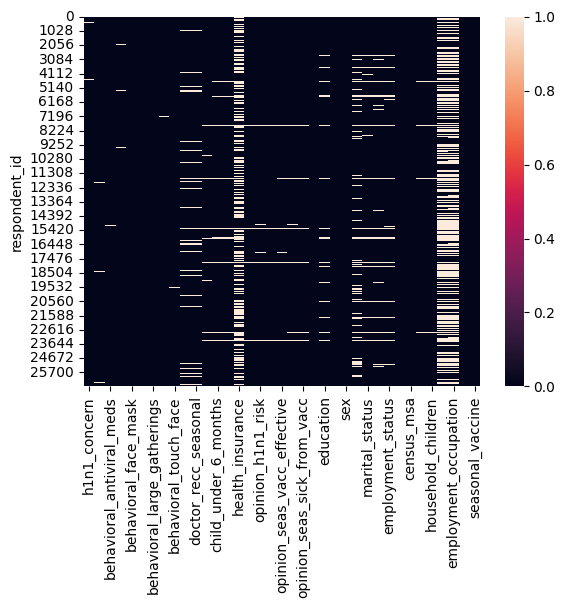

In [48]:
sns.heatmap(train.isnull())

1.Columns like health_insurance, employment_industry, and employment_occupation have many missing values.
2.Income_poverty also shows a significant amount of missing data.
3.Doctor_recc_h1n1 and doctor_recc_seasonal have the same proportion of missing values.


In [49]:
ordinal_cols = train.select_dtypes("float64").columns.to_list()
object_cols = train.select_dtypes("object").columns.to_list()
behavioral_cols = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands","behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face"]
opinion_cols = ["opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc","opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]

Given that all the columns in the dataset are categorical, it would be beneficial to examine the mode for each column. This is particularly important as we are likely to use the mode to impute missing values in our dataset.

In [50]:
ord_summary = train.loc[:, ordinal_cols].describe()
pd.concat([ord_summary, train[ordinal_cols].mode()]).rename(index={0: "mean"})

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000
mean,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,0.000000


In [51]:
train.loc[:, object_cols].describe()
print("Ordinal columns:", len(ordinal_cols))
print("Nominal columns:", len(object_cols))

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


To compare missing values with other categories, we will create a copy of the train dataframe and fill in all the missing values with "Missing". This will allow us to perform a crosstabular analysis and compare the missing values to other categories more effectively.

In [53]:
nan_to_miss = train.copy()
nan_to_miss.fillna("Missing", inplace=True)

In [54]:
train[train["education"].isna()].tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,oxchjgsf,Non-MSA,1.0,2.0,NaN,NaN,0,1
26608,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,NaN,Other or Multiple,Female,NaN,NaN,NaN,NaN,lrircsnp,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0
26639,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,4.0,4.0,4.0,4.0,1.0,4.0,65+ Years,NaN,Hispanic,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,0
26672,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18 - 34 Years,NaN,Black,Female,NaN,NaN,NaN,NaN,fpwskwrf,"MSA, Principle City",NaN,NaN,NaN,NaN,0,1
26675,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,NaN,4.0,2.0,2.0,4.0,4.0,2.0,45 - 54 Years,NaN,White,Male,NaN,NaN,NaN,NaN,kbazzjca,Non-MSA,1.0,1.0,NaN,NaN,0,1


Missing values in education often coincide with missing values in income_poverty, marital_status, rent_or_own, employment_status, employment_industry, and employment_occupation columns.

Rows with missing values in doctor_recc_seasonal also have missing values in doctor_recc_h1n1.

### **1.3 Handling Missing Values**

To capture the missing value pattern in the dataset, we will create a new category called "Unknown" for nominal columns and assign a value of 2 as "Unknown" for ordinal columns in both the training and test data. This approach allows us to effectively handle and represent missing values in our dataset without significantly increasing the length of our code.

In [58]:
for df in [train, test]:
    df['doctor_recc_h1n1'].fillna(2.0, inplace=True)
    df['doctor_recc_seasonal'].fillna(2.0, inplace=True)
    df['health_insurance'].fillna(2.0, inplace=True)

    df["education"].fillna("Unknown", inplace=True)
    df["marital_status"].fillna("Unknown", inplace=True)
    df["rent_or_own"].fillna("Unknown", inplace=True)
    df["income_poverty"].fillna("Unknown", inplace=True)

In [59]:
for df in [train, test]:
    df['employment_status'].fillna("Not in Labor Force", inplace=True);

In [60]:
for df in [train, test]:
    for row in range(df.index[0], df.index[-1]+1):  # Iterate over the rows of the DataFrame.
        if (df.loc[row, "employment_status"] == "Not in Labor Force") or (df.loc[row, "employment_status"] == "Unemployed"):
            df.loc[row, "employment_occupation"] = "None"  # Set the value of 'employment_occupation' to "None" for the current row.
            df.loc[row, "employment_industry"] = "None"  # Set the value of 'employment_industry' to "None" for the current row.

To avoid introducing bias, we will impute the missing values in the **respondent's opinion columns** with the value 3, which represents "Don't know." This approach ensures that the missing values are treated uniformly and does not influence the analysis based on the respondents' opinions.

In [61]:
for df in [train, test]:
    df[opinion_cols] = df[opinion_cols].fillna(3.0)

In [ ]:
sns.heatmap(train.isnull())

### Using Simple Imputer for Handling Missing Values

In [62]:
imputer = SimpleImputer(strategy='most_frequent')  
train[ordinal_cols] = imputer.fit_transform(train[ordinal_cols]) 
test[ordinal_cols] = imputer.transform(test[ordinal_cols])  
train[object_cols] = imputer.fit_transform(train[object_cols])  
test[object_cols] = imputer.transform(test[object_cols]) 

### **1.4 Handling Other Issues**

To ensure compatibility with various machine learning algorithms and statistical techniques, we will convert the columns with dtype `float64` to `int64`. This conversion will effectively transform these variables from continuous to discrete, as many algorithms require discrete variables as input. By making these variables discrete, we can leverage the full range of analytical tools and methods available for categorical data analysis.

In [63]:
train[ordinal_cols] = train[ordinal_cols].astype("int64") 
test[ordinal_cols] = test[ordinal_cols].astype("int64")  
print("Train duplicates:", train.duplicated().sum()) 
print("Test duplicates:", test.duplicated().sum())   

In [65]:
dict_age_group = {"65+ Years": 75, "55 - 64 Years": 60, "45 - 54 Years": 50, "18 - 34 Years": 26, "35 - 44 Years" : 40}
for df in [train, test]:
    df['age_group'] = df['age_group'].map(dict_age_group)

In [66]:
for col in ordinal_cols:
  print(col + ":", sorted(train[col].unique())) 
for col in object_cols:
  print(col + ":", train[col].unique())        
  print()

h1n1_concern: [0, 1, 2, 3]
h1n1_knowledge: [0, 1, 2]
behavioral_antiviral_meds: [0, 1]
behavioral_avoidance: [0, 1]
behavioral_face_mask: [0, 1]
behavioral_wash_hands: [0, 1]
behavioral_large_gatherings: [0, 1]
behavioral_outside_home: [0, 1]
behavioral_touch_face: [0, 1]
doctor_recc_h1n1: [0, 1, 2]
doctor_recc_seasonal: [0, 1, 2]
chronic_med_condition: [0, 1]
child_under_6_months: [0, 1]
health_worker: [0, 1]
health_insurance: [0, 1, 2]
opinion_h1n1_vacc_effective: [1, 2, 3, 4, 5]
opinion_h1n1_risk: [1, 2, 3, 4, 5]
opinion_h1n1_sick_from_vacc: [1, 2, 3, 4, 5]
opinion_seas_vacc_effective: [1, 2, 3, 4, 5]
opinion_seas_risk: [1, 2, 3, 4, 5]
opinion_seas_sick_from_vacc: [1, 2, 3, 4, 5]
household_adults: [0, 1, 2, 3]
household_children: [0, 1, 2, 3]
age_group: [60 40 26 75 50]

education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'Unknown']

race: ['White' 'Black' 'Other or Multiple' 'Hispanic']

sex: ['Female' 'Male']

income_poverty: ['Below Poverty' '<= $75,000, Above P

# **2. Exploratory Data Analysis**
### **2.1 Univariate Exploration**
We will begin by directing our attention to comprehending the distribution of categorical data, prioritizing an understanding of its characteristics without delving into its relationship with other variables.

In [ ]:
non_binary_cols = [col for col in ordinal_cols if train[col].nunique() > 2]
fig, ax = plt.subplots(4, 4, figsize=(25, 20))  
for i, col in enumerate(non_binary_cols):  
    subplot = ax[i//4, i%4]
    sns.countplot(data=train, y=col, ax=subplot, palette="dark").bar_label(subplot.containers[0])
for i in range(len(non_binary_cols), 4*4):
    fig.delaxes(ax.flatten()[i])
plt.tight_layout()

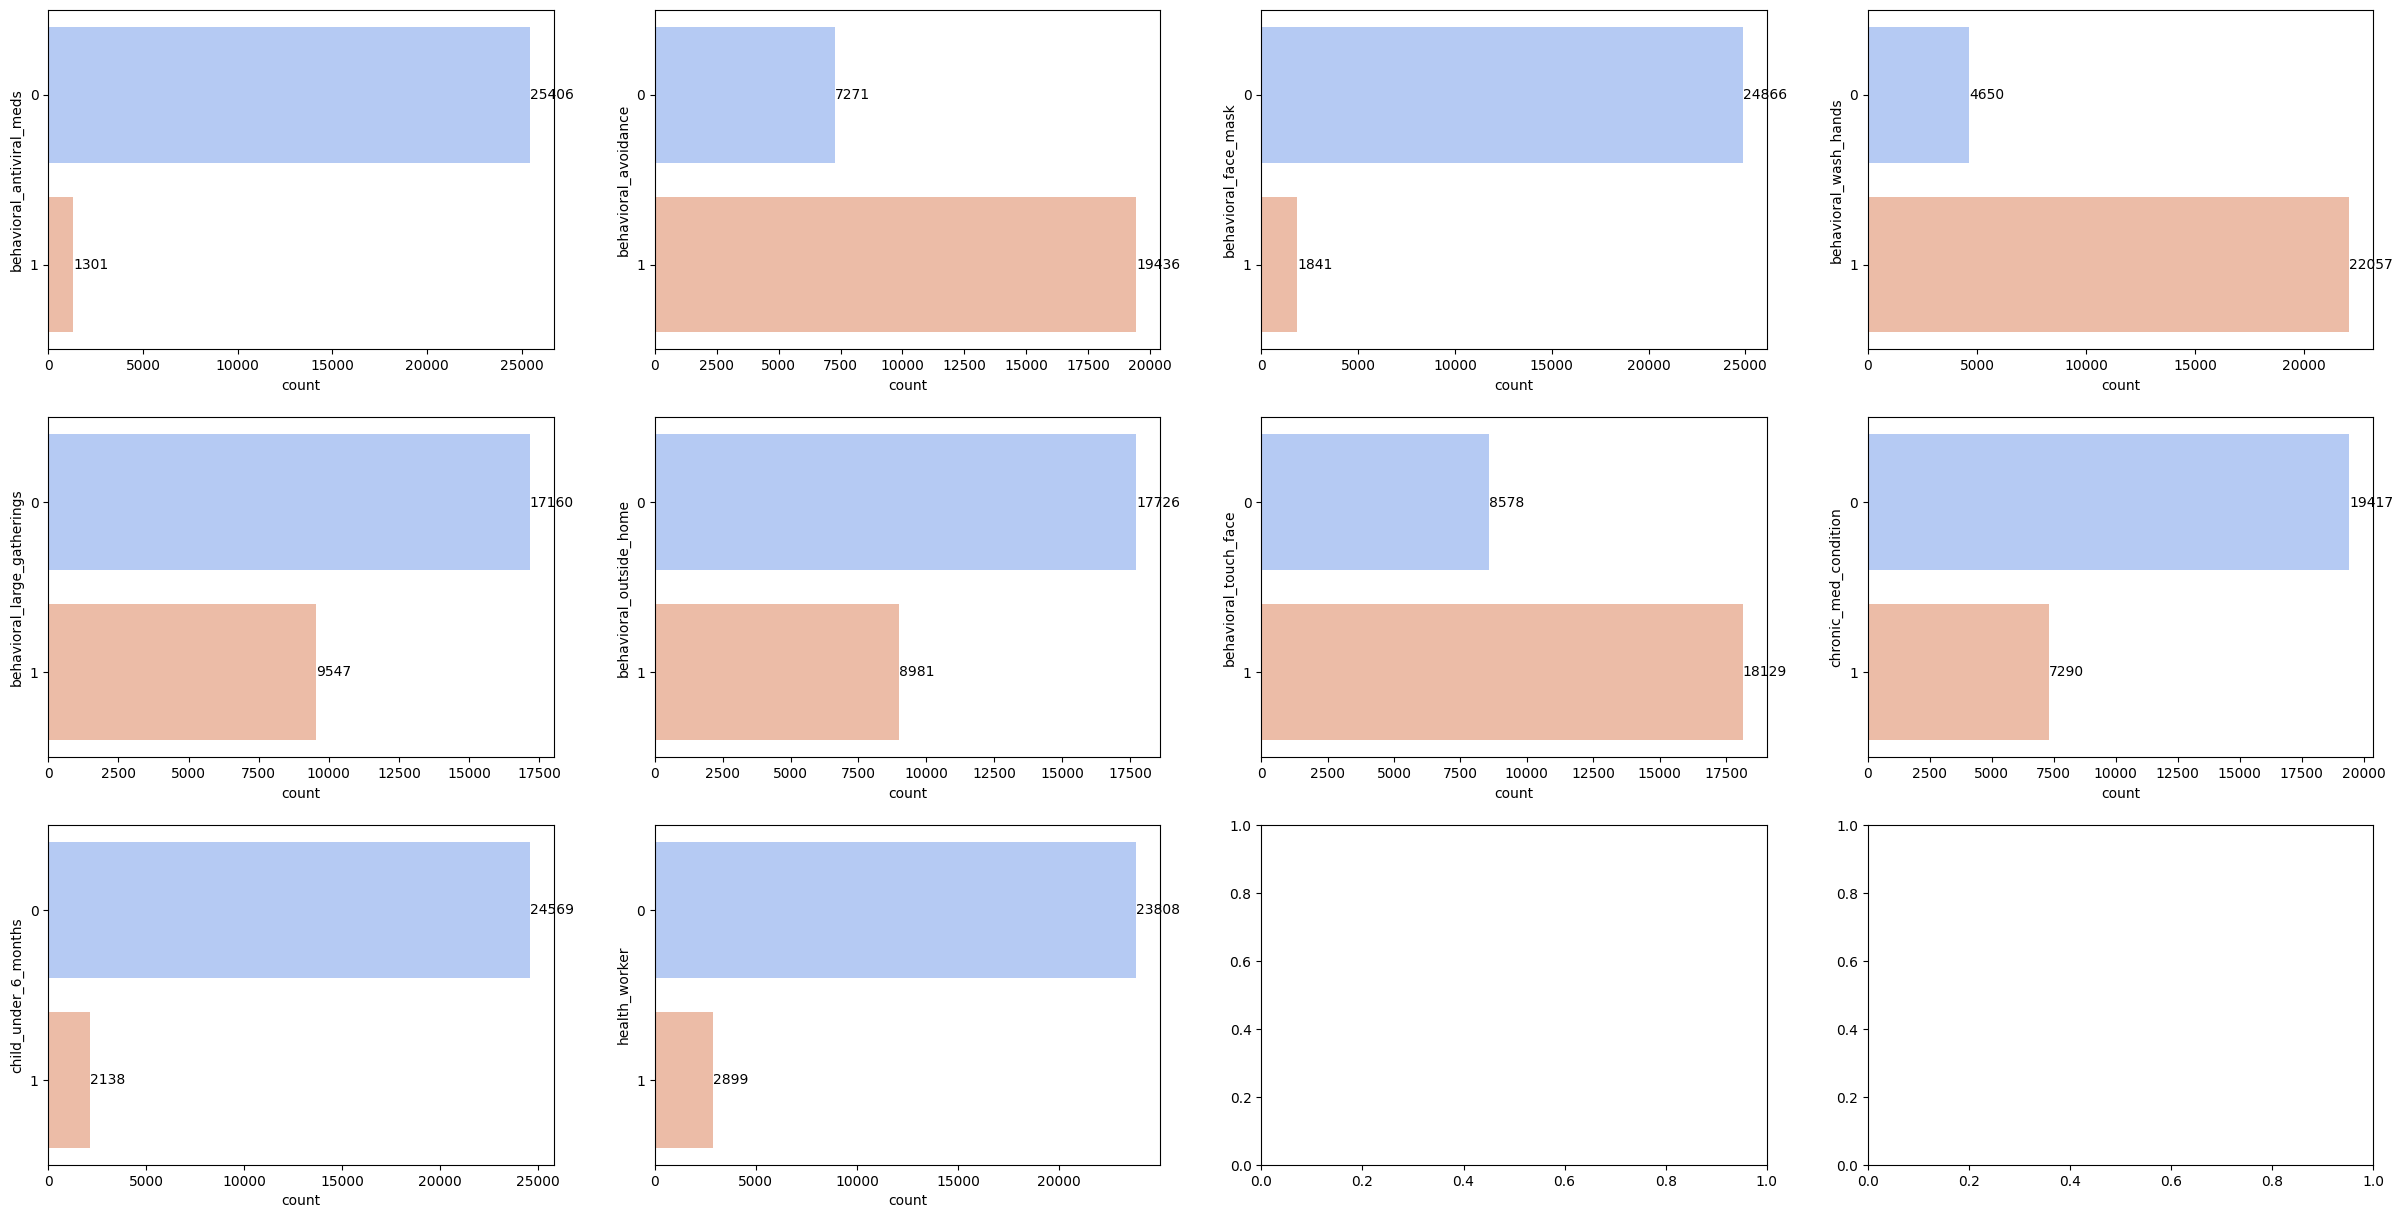

In [32]:
binary_cols = [col for col in ordinal_cols if train[col].nunique() == 2]
fig, ax = plt.subplots(3, 4, figsize=(30, 15))  
for i, col in enumerate(binary_cols):  
    if i < 3 * 4:  # Only create subplots for the available number of binary columns
        subplot = ax[i//4, i%4]
        sns.countplot(data=train, y=col, ax=subplot, palette="coolwarm").bar_label(subplot.containers[0])
for i in range(len(binary_cols), 3*4):
    fig.delaxes(ax.flatten()[i])
plt.tight_layout()

Considering that the "None" category overwhelmingly dominates all other categories in the `employment_industry` and `employment_occupation` columns, it is apparent that plotting these columns would not yield any valuable insights. Therefore, we will exclude them from our analysis.

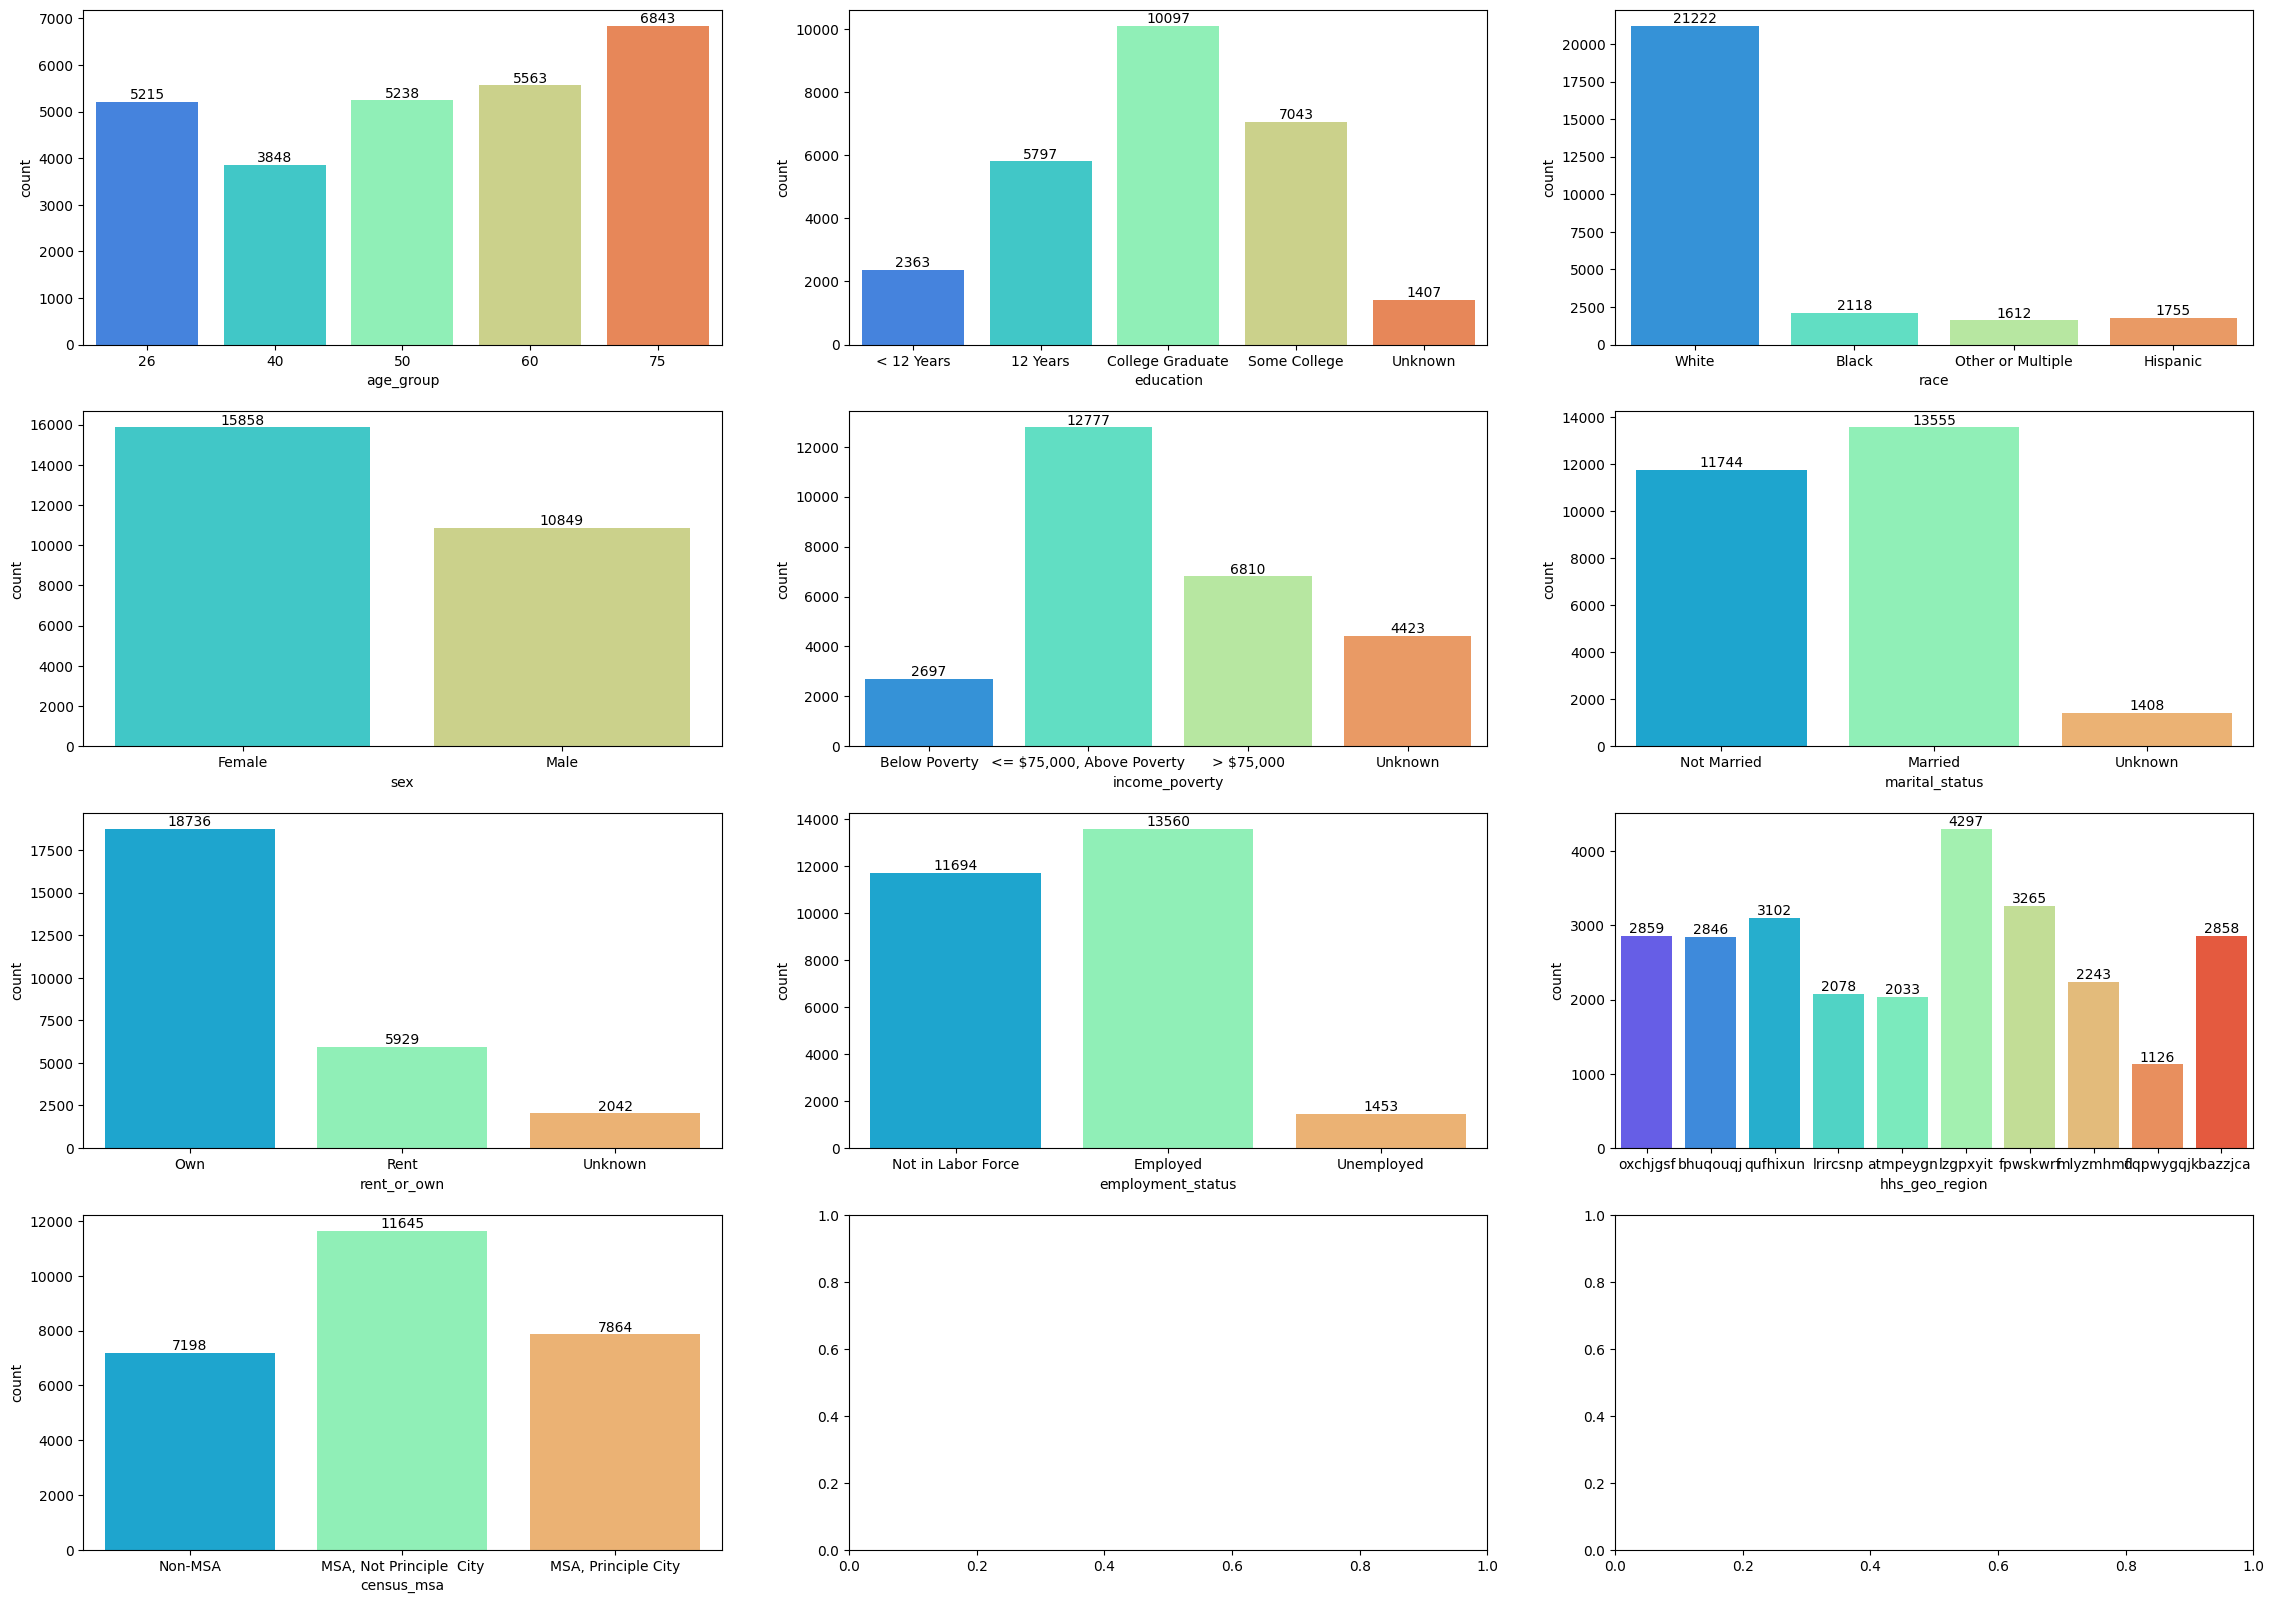

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(25, 13))

for i, col in enumerate(["health_worker", "doctor_recc_h1n1", "doctor_recc_seasonal"]):
    bar = sns.barplot(data=train, y='h1n1_vaccine', x=col, ax=ax[i, 0], palette="Set2")
    bar.bar_label(bar.containers[0])

    bar = sns.barplot(data=train, y='seasonal_vaccine', x=col, ax=ax[i, 1], palette="Set2")
    bar.bar_label(bar.containers[0])

plt.tight_layout()


### **2.2. Bivariate Exploration**
Our attention now turns to comprehending the correspondence and relationship between two specific columns, particularly in relation to the target variable. The aim of this endeavor is to gain a deeper understanding of the fundamental patterns and connections inherent within our dataset.

The bar plot indicates a notable pattern where individuals with specific chronic medical conditions, such as asthma, diabetes, heart conditions, kidney conditions, sickle cell anemia, neurological or neuromuscular conditions, liver conditions, or weakened immune systems due to chronic illnesses or medications, tend to exhibit more proactive behavioral precautions to prevent the occurrence of flu-like illnesses.

The bar plot clearly indicates that individuals employed in the "haxffmxo" and "fcxhlnwr" industries have a higher likelihood of receiving both the H1N1 and seasonal vaccines. Similarly, those with employment occupations such as "dcjcmpih" and "cmhcxjea" also exhibit a higher likelihood of receiving both vaccines. These findings emphasize the positive association between specific employment industries and occupations with vaccine uptake for both H1N1 and seasonal viruses.

### **Summary:**
* People with chronic medical conditions are more likely to take preventive measures against flu-like illnesses.

* Specific employment industries and occupations show higher vaccine uptake for both H1N1 and seasonal flu vaccines.

* Healthcare workers have a higher likelihood of receiving both vaccines.

* Doctor recommendations strongly influence vaccine uptake.

* Perceived vaccine effectiveness and risk of illness are important factors.

* Other factors like concern about H1N1, older age, not being in the labor force, and no children in the household are associated with higher seasonal flu vaccine uptake.

## Feature Engineering


In [67]:
for df in [train, test]:
    df["good_behavioral_count"] = df[behavioral_cols].sum(axis=1)
    for i in range(df.index[0], df.index[-1]+1):
        if df.loc[i, ["doctor_recc_h1n1", "doctor_recc_seasonal"]].isin([2]).all():
            df.loc[i, "has_doc_recc"] = 0
        else:
            df.loc[i, "has_doc_recc"] = 1

In [68]:
for new_ord_feature in ["good_behavioral_count", "has_doc_recc"]:
    ordinal_cols.append(new_ord_feature)

In [69]:
train_rows = train.shape[0]
merged_df = pd.concat([train, test])
for col in ["age_group", "education"]:
  merged_df[col], _ = merged_df[col].factorize()
merged_df = pd.get_dummies(merged_df, columns=["race", "sex", "marital_status", "rent_or_own", "employment_status", "hhs_geo_region",
                                               "census_msa", "employment_industry", "employment_occupation", "income_poverty"])
train = merged_df.iloc[:train_rows]
test = merged_df.iloc[train_rows:].drop(columns=["h1n1_vaccine", "seasonal_vaccine"])

In [74]:
skf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [75]:
x_train = train.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
y_h1n1 = train.pop("h1n1_vaccine")
y_seas = train.pop("seasonal_vaccine")

In [76]:
x_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,household_adults,household_children,good_behavioral_count,has_doc_recc,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,marital_status_Unknown,rent_or_own_Own,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_None,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_None,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,0,0,0,0,2,1.0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,1,1,0,0,4,1.0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,0,2,2,1,0,0,2,3,1,1,4,1,2,2,2,2,0,1,0.0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,3,3,5,5,4,1,3,1,0,0,3,1.0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,3,3,2,3,1,4,4,3,1,0,4,1.0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Model Training

Using 10 Fold Cross Validation

## Logistic Regression

In [77]:
%%time
logit_cv = cross_val_score(make_pipeline(PowerTransformer(), LogisticRegression()), 
                           x_train, 
                           y_h1n1, 
                           scoring = 'roc_auc',
                           cv = skf, 
                           n_jobs = -1)

print(f"The average 10-folds of ROC-AUC score of the Logistic Regression is {logit_cv.mean()}")

The average 10-folds of ROC-AUC score of the Logistic Regression is 0.8533815070260949
CPU times: user 104 ms, sys: 13.9 ms, total: 118 ms
Wall time: 14.7 s


In [78]:
%%time
logit_cv = cross_val_score(make_pipeline(PowerTransformer(), LogisticRegression()), 
                           x_train, 
                           y_seas, 
                           scoring = 'roc_auc',
                           cv = skf, 
                           n_jobs = -1)

print(f"The average 10-folds of ROC-AUC score of the Logistic Regression is {logit_cv.mean()}")

The average 10-folds of ROC-AUC score of the Logistic Regression is 0.8459281488505722
CPU times: user 88.7 ms, sys: 21 ms, total: 110 ms
Wall time: 15.1 s


## Random Forest Classifier

In [79]:
%%time
RF_cv = cross_val_score(RandomForestClassifier(n_estimators = 100,
                                               max_depth = 3,
                                               min_samples_leaf = 3,
                                               random_state = 10,
                                               n_jobs = -1),
                        x_train, 
                        y_h1n1, 
                        scoring = 'roc_auc',
                        cv = skf, 
                        n_jobs = -1)
print(f"The average 10-folds oof ROC-AUC score of the Random Forest is {RF_cv.mean()}")

The average 10-folds oof ROC-AUC score of the Random Forest is 0.8311811817716389
CPU times: user 88.6 ms, sys: 12 ms, total: 101 ms
Wall time: 5 s


In [80]:
%%time
RF_cv = cross_val_score(RandomForestClassifier(n_estimators = 100,
                                               max_depth = 3,
                                               min_samples_leaf = 3,
                                               random_state = 10,
                                               n_jobs = -1),
                        x_train, 
                        y_seas, 
                        scoring = 'roc_auc',
                        cv = skf, 
                        n_jobs = -1)

print(f"The average 10-folds oof ROC-AUC score of the Random Forest is {RF_cv.mean()}")

The average 10-folds oof ROC-AUC score of the Random Forest is 0.8210658348934027
CPU times: user 85.4 ms, sys: 17 ms, total: 102 ms
Wall time: 5.13 s


## Gradient Boosting Classifier

In [41]:
%%time
GB_cv = cross_val_score(GradientBoostingClassifier(n_estimators = 100,learning_rate = 0.1, max_depth = 4,  min_samples_leaf = 5, subsample = 0.8,random_state = 1),x_train, y_h1n1, scoring = 'roc_auc',cv = skf, n_jobs = -1)
print(f"The average 10-folds of ROC-AUC score of the Gradient Boosting is {GB_cv.mean()}")

The average 10-folds of ROC-AUC score of the Gradient Boosting is 0.869726717833862
CPU times: user 95.4 ms, sys: 19 ms, total: 114 ms
Wall time: 32.8 s


In [81]:
%%time
GB_cv = cross_val_score(GradientBoostingClassifier(n_estimators = 100,learning_rate = 0.1, max_depth = 4,  min_samples_leaf = 5,  subsample = 0.8,random_state = 1), x_train, y_seas,  scoring = 'roc_auc',cv = skf, n_jobs = -1)
print(f"The average 10-folds of ROC-AUC score of the Gradient Boosting is {GB_cv.mean()}")

The average 10-folds of ROC-AUC score of the Gradient Boosting is 0.8635828818933501
CPU times: user 86.8 ms, sys: 26 ms, total: 113 ms
Wall time: 33.2 s


## Hist Gradient Boosting

In [82]:
%%time
HG_cv = cross_val_score(HistGradientBoostingClassifier(max_iter = 100,max_depth = 4,random_state = 10), x_train, y_h1n1, scoring = 'roc_auc',cv = skf, n_jobs = -1)
print(f"The average 10-folds oof ROC-AUC score of the HistGradient is {HG_cv.mean()}")

The average 10-folds oof ROC-AUC score of the HistGradient is 0.8696546203028719
CPU times: user 90.4 ms, sys: 19 ms, total: 109 ms
Wall time: 8.57 s


In [83]:
%%time
HG_cv = cross_val_score(HistGradientBoostingClassifier(max_iter = 100,max_depth = 4,random_state = 10), x_train, y_seas, scoring = 'roc_auc',cv = skf, n_jobs = -1)
print(f"The average 10-folds oof ROC-AUC score of the HistGradient is {HG_cv.mean()}")

The average 10-folds oof ROC-AUC score of the HistGradient is 0.862906457694874
CPU times: user 83 ms, sys: 18.9 ms, total: 102 ms
Wall time: 8.56 s


In [118]:
x_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1',
       ...
       'employment_occupation_uqqtjvyb', 'employment_occupation_vlluhbov',
       'employment_occupation_xgwztkwe', 'employment_occupation_xqwwgdyp',
       'employment_occupation_xtkaffoo', 'employment_occupation_xzmlyyjv',
       'income_poverty_<= $75,000, Above Poverty', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty', 'income_poverty_Unknown'],
      dtype='object', length=105)

In [85]:
column_list = x_train.columns.tolist()

In [86]:
clean_feature_names = [col.replace('[', '').replace(']', '').replace('<', '') for col in x_train.columns]


In [87]:
x_train.columns = clean_feature_names


## XGBClassifier

In [88]:
%%time
XGB_cv = cross_val_score(XGBClassifier(n_estimators = 100,max_depth = 4,  min_child_weight = 15, subsample = 0.9,random_state = 20),  x_train, y_h1n1, scoring = 'roc_auc',cv = skf, n_jobs = -1)
print(f"The average 10-folds oof ROC-AUC score of the XGB is {XGB_cv.mean()}")

The average 10-folds oof ROC-AUC score of the XGB is 0.8681527816964782
CPU times: user 90 ms, sys: 15 ms, total: 105 ms
Wall time: 45.4 s


In [89]:
%%time
XGB_cv = cross_val_score(XGBClassifier(n_estimators = 100,max_depth = 4,min_child_weight = 15, subsample = 0.9,random_state = 20), x_train, y_seas,  scoring = 'roc_auc', cv = skf, n_jobs = -1)
print(f"The average 10-folds oof ROC-AUC score of the XGB is {XGB_cv.mean()}")

The average 10-folds oof ROC-AUC score of the XGB is 0.8617723423820554
CPU times: user 111 ms, sys: 17 ms, total: 128 ms
Wall time: 45.8 s


In [90]:
clean_feature_names = [re.sub(r'[^\w\s]', '', col) for col in x_train.columns]
x_train.columns = clean_feature_names


## LGBM Classifier

In [91]:
%%time
LGBM_cv = cross_val_score(LGBMClassifier(n_estimators = 100,max_depth = 5,num_leaves = 30, subsample = 0.7,random_state = 10), x_train, y_h1n1, scoring = 'roc_auc',cv = skf, n_jobs = -1)
print(f"The average 10-folds oof ROC-AUC score of the LGBM is {LGBM_cv.mean()}")

The average 10-folds oof ROC-AUC score of the LGBM is 0.8704657627959642
CPU times: user 110 ms, sys: 21.9 ms, total: 132 ms
Wall time: 12.4 s


In [92]:
%%time
LGBM_cv = cross_val_score(LGBMClassifier(n_estimators = 100,max_depth = 5, num_leaves = 30, subsample = 0.7,random_state = 10),  x_train, y_seas, scoring = 'roc_auc',cv = skf,  n_jobs = -1)
print(f"The average 10-folds oof ROC-AUC score of the LGBM is {LGBM_cv.mean()}")

The average 10-folds oof ROC-AUC score of the LGBM is 0.8631946152953096
CPU times: user 102 ms, sys: 20 ms, total: 122 ms
Wall time: 10.7 s


In [93]:
to_tran_power = x_train.columns
power_tran = ColumnTransformer([('stand', PowerTransformer(), to_tran_power)], remainder = 'passthrough')

## Support Vector Machine

In [95]:
%%time
SVM_cv = cross_val_score(SVC(kernel='rbf', 
                             C=1.0, 
                             gamma='scale', 
                             random_state=10), 
                         x_train, 
                         y_h1n1, 
                         scoring='roc_auc',
                         cv=skf, 
                         n_jobs=-1)

print(f"The average 10-folds oof ROC-AUC score of the SVM is {SVM_cv.mean()}")


The average 10-folds oof ROC-AUC score of the SVM is 0.8560266242947172
CPU times: user 110 ms, sys: 20.3 ms, total: 130 ms
Wall time: 7min 35s


In [96]:
%%time
SVM_cv = cross_val_score(SVC(kernel='rbf', 
                             C=1.0, 
                             gamma='scale', 
                             random_state=10), 
                         x_train, 
                         y_seas, 
                         scoring='roc_auc',
                         cv=skf, 
                         n_jobs=-1)

print(f"The average 10-folds oof ROC-AUC score of the SVM is {SVM_cv.mean()}")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The average 10-folds oof ROC-AUC score of the SVM is 0.8520501937987579
CPU times: user 154 ms, sys: 107 ms, total: 261 ms
Wall time: 4min 48s


### Checking the Models ROC-AUC Scores

In [97]:
model_performance = pd.DataFrame()
model_performance['Model'] = ['Logistic', 'RF','GB', 'Hist', 'LGBM', 'XGB']
model_performance['ROC-AUC Score'] = [logit_cv.mean(), RF_cv.mean(), GB_cv.mean(), HG_cv.mean(), 
                                             LGBM_cv.mean(), XGB_cv.mean()]
print(f"The followig table shows the performance of the considered models: \n\n{model_performance}")


The followig table shows the performance of the considered models: 

      Model  ROC-AUC Score
0  Logistic       0.845928
1        RF       0.821066
2        GB       0.863583
3      Hist       0.862906
4      LGBM       0.863195
5       XGB       0.861772


# Building a Voting  Classifier

A Voting Classifier combines diverse machine learning models, leveraging their individual strengths to make more robust and accurate predictions. It enhances generalization, mitigates overfitting, and provides increased stability by aggregating multiple models. This ensemble technique is particularly useful when different algorithms offer complementary insights, leading to improved overall performance.







In [98]:
md1 = GradientBoostingClassifier(n_estimators = 100,
                                 learning_rate = 0.1,
                                 max_depth = 4, 
                                 min_samples_leaf = 5, 
                                 subsample = 0.8,
                                 random_state = 1)

md2 = HistGradientBoostingClassifier(max_iter = 100,
                                     max_depth = 4,
                                     random_state = 10)

md3 = LGBMClassifier(n_estimators = 100,
                     max_depth = 5,
                     num_leaves = 30, 
                     subsample = 0.7,
                     random_state = 10)



md5 = XGBClassifier(n_estimators = 100,
                    max_depth = 4,
                    min_child_weight = 15, 
                    subsample = 0.9,
                    random_state = 20)


voting_md = VotingClassifier(estimators = [('GB', md1),
                                           ('HB', md2), 
                                           ('LGBM', md3),  
                                           ('XGB', md5)],
                             voting = 'soft',
                             weights = [1/4, 1/4, 1/4, 1/4])

voting_md

VotingClassifier(estimators=[('GB',
                              GradientBoostingClassifier(max_depth=4,
                                                         min_samples_leaf=5,
                                                         random_state=1,
                                                         subsample=0.8)),
                             ('HB',
                              HistGradientBoostingClassifier(max_depth=4,
                                                             random_state=10)),
                             ('LGBM',
                              LGBMClassifier(max_depth=5, num_leaves=30,
                                             random_state=10, subsample=0.7)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_byl...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=15, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=20, ...))],
                 voting='soft', weights=[0.2, 0.2, 0.2, 0.2])

In [99]:
%%time
vot_cv = cross_val_score(voting_md, 
                        x_train, 
                        y_h1n1, 
                         cv = skf,
                         scoring = 'roc_auc',
                         n_jobs = -1)

print(f"The ROC-AUC score of Voting Classifier is {vot_cv.mean()}")

The ROC-AUC score of Voting Classifier is 0.8717360154084044
CPU times: user 117 ms, sys: 22.2 ms, total: 140 ms
Wall time: 3min 22s


In [100]:
%%time
vot_cv = cross_val_score(voting_md, 
                        x_train, 
                        y_seas, 
                         cv = skf,
                         scoring = 'roc_auc',
                         n_jobs = -1)

print(f"The ROC-AUC score of Voting Classifier is {vot_cv.mean()}")

The ROC-AUC score of Voting Classifier is 0.8646698748087231
CPU times: user 121 ms, sys: 17.2 ms, total: 138 ms
Wall time: 3min 44s


# Building a Stacking Classifier

 Stacking Classifier excels by blending predictions from multiple models through a meta-classifier. It leverages diverse algorithms, capturing nuanced patterns in data. Stacking optimizes performance by learning to weigh the strengths of base models, enhancing predictive accuracy and robustness. This versatile ensemble approach is effective for handling complex relationships in diverse datasets.

In [101]:
stacker_md = StackingClassifier(estimators = [('GB', md1),
                                              ('HB', md2), 
                                              ('LGBM', md3),  
                                              ('XGB', md5)],
                                final_estimator = LogisticRegression(),
                                stack_method = 'predict_proba', 
                                n_jobs = -1)

stacker_md

StackingClassifier(estimators=[('GB',
                                GradientBoostingClassifier(max_depth=4,
                                                           min_samples_leaf=5,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('HB',
                                HistGradientBoostingClassifier(max_depth=4,
                                                               random_state=10)),
                               ('LGBM',
                                LGBMClassifier(max_depth=5, num_leaves=30,
                                               random_state=10,
                                               subsample=0.7)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_b...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=15, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=20, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   stack_method='predict_proba')

In [102]:
%%time
stack_cv = cross_val_score(stacker_md, 
                           x_train, 
                           y_h1n1, 
                           cv = skf,
                           scoring = 'roc_auc',
                           n_jobs = -1)

print(f"The 10 folds oof ROC-AUC score of Stacker Classifier is {stack_cv.mean()}")

The 10 folds oof ROC-AUC score of Stacker Classifier is 0.8716919543204149
CPU times: user 167 ms, sys: 33.4 ms, total: 201 ms
Wall time: 18min 43s


In [103]:
%%time
stack_cv = cross_val_score(stacker_md, 
                           x_train, 
                           y_seas, 
                           cv = skf,
                           scoring = 'roc_auc',
                           n_jobs = -1)

print(f"The 10 folds oof ROC-AUC score of Stacker Classifier is {stack_cv.mean()}")

The 10 folds oof ROC-AUC score of Stacker Classifier is 0.8646777097360315
CPU times: user 195 ms, sys: 45.5 ms, total: 241 ms
Wall time: 19min 34s


In [130]:
y_seas.head(100)

respondent_id
0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
     ... 
95    0.0
96    1.0
97    1.0
98    0.0
99    1.0
Name: seasonal_vaccine, Length: 100, dtype: float64

In [104]:
%%time
vot_md_h1n1 = voting_md.fit(x_train, y_h1n1)
vot_md_seas = voting_md.fit(x_train, y_seas)
stack_md_h1n1 = stacker_md.fit(x_train, y_h1n1)
stack_md_seas = stacker_md.fit(x_train, y_seas)

CPU times: user 5min 8s, sys: 4.69 s, total: 5min 13s
Wall time: 5min 1s


In [106]:
test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,household_adults,household_children,good_behavioral_count,has_doc_recc,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,marital_status_Unknown,rent_or_own_Own,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_None,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_None,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2,2,0,1,0,1,1,0,1,0,0,0,0,0,1,5,1,1,5,1,1,1,2,1,0,4,1.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26708,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,4,1,1,2,1,3,0,0,1.0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
26709,2,2,0,0,1,1,1,1,1,0,0,0,0,0,2,5,4,2,5,4,4,0,2,1,0,5,1.0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26710,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,4,2,2,4,4,2,3,1,1,0,0,1.0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26711,3,1,1,1,0,1,1,1,1,0,0,0,0,1,1,5,2,4,4,4,2,1,1,0,1,6,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [121]:
index_values = test.index.values
submission = pd.DataFrame(index_values, columns=['respondent_id'])

In [122]:

column_list_test = test.columns.tolist()
clean_feature_names_test= [col.replace('[', '').replace(']', '').replace('<', '') for col in test.columns]
test.columns = clean_feature_names_test

clean_feature_names_test1 = [re.sub(r'[^\w\s]', '', col) for col in test.columns]
test.columns = clean_feature_names_test1 

In [123]:
test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,household_adults,household_children,good_behavioral_count,has_doc_recc,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,marital_status_Unknown,rent_or_own_Own,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,census_msa_MSA Not Principle City,census_msa_MSA Principle City,census_msa_NonMSA,employment_industry_None,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_None,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,income_poverty_ 75000 Above Poverty,income_poverty_ 75000,income_poverty_Below Poverty,income_poverty_Unknown
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2,2,0,1,0,1,1,0,1,0,0,0,0,0,1,5,1,1,5,1,1,1,2,1,0,4,1.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26708,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,4,1,1,2,1,3,0,0,1.0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
26709,2,2,0,0,1,1,1,1,1,0,0,0,0,0,2,5,4,2,5,4,4,0,2,1,0,5,1.0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26710,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,4,2,2,4,4,2,3,1,1,0,0,1.0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26711,3,1,1,1,0,1,1,1,1,0,0,0,0,1,1,5,2,4,4,4,2,1,1,0,1,6,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [137]:
submission 

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.200430,0.165852
1,26708,0.034887,0.074470
2,26709,0.672116,0.720260
3,26710,0.877846,0.887291
4,26711,0.425970,0.404741
...,...,...,...
26703,53410,0.468777,0.456429
26704,53411,0.335225,0.287816
26705,53412,0.220468,0.181343
26706,53413,0.323197,0.275604


In [131]:
submission['h1n1_vaccine'] = (vot_md_h1n1.predict_proba(test)[:, 1] )
submission.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.200430,0.183141
1,26708,0.034887,0.054679
2,26709,0.672116,0.696188
3,26710,0.877846,0.882569
4,26711,0.425970,0.415356


In [132]:
submission['seasonal_vaccine'] = (stack_md_seas.predict_proba(test)[:, 1])
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.200430,0.165852
1,26708,0.034887,0.074470
2,26709,0.672116,0.720260
3,26710,0.877846,0.887291
4,26711,0.425970,0.404741
...,...,...,...
26703,53410,0.468777,0.456429
26704,53411,0.335225,0.287816
26705,53412,0.220468,0.181343
26706,53413,0.323197,0.275604


In [138]:
submission.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26703,53410,0.468777,0.456429
26704,53411,0.335225,0.287816
26705,53412,0.220468,0.181343
26706,53413,0.323197,0.275604
26707,53414,0.613550,0.649933


In [136]:
submission.to_csv('analytica_X.csv', index=False)

<hr><hr>

# Conclusion

In this project, an ensemble approach combining various machine learning classifiers, including Gradient Boosting, Histogram-based Gradient Boosting, Support Vector Machines, and XGBoost, was employed for predicting the likelihood of H1N1 vaccine adoption. The models were fine-tuned with appropriate hyperparameters, and the ensemble was implemented using a soft voting mechanism. However, challenges were encountered during evaluation due to differences in the availability of the predict_proba method among the classifiers. Resolving this issue by explicitly enabling probability estimation improved the ROC-AUC scoring. The project highlights the importance of careful consideration in constructing ensemble models and addressing compatibility issues to enhance predictive performance.